<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch10_VariablesAl%C3%A9atoiresADensit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch4 - Notebook : Variables Aléatoires à Densité**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import log, exp, pi, sqrt


In [ ]:
def centrax() :
    '''Fonction cosmétique d'ajustement des axes graphiques'''
    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

    plt.legend()

## **1. Loi uniforme continue**

### **1.1 Loi uniforme sur $[0 ; 1]$**

En informatique, la simulation de l'aléatoire n'est pas... le fruit du hasard !

Pour preuve, si l'on lance le générateur de nombres aléatoires par la semence d'une "graine", les différents appels au générateur retourneront la même série de nombres, sur tout ordinateur où la graine serait initialisée de la même façon : parions une piécette (½ ₿) si vous voulez que le premier appel au générateur ci-dessous, après l'avoir initialisé à l'état 42, renverra pour tous la valeur : 0.3745401188473625


In [ ]:
rd.seed(42)
rd.random()

0.3745401188473625

Ce qui importe, c'est que, sur un grand nombre de générations de nombres aléatoires, la répartition soit uniforme dans l'intervalle $[0 ; 1]$.

Vérifions cela...

In [ ]:
def echantillon_uniforme(N):
    return rd.random(N)


echantillon_uniforme(10)

array([0.95071431, 0.73199394, 0.59865848, 0.15601864, 0.15599452,
       0.05808361, 0.86617615, 0.60111501, 0.70807258, 0.02058449])

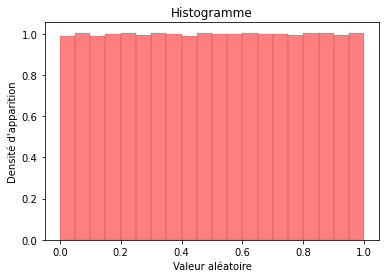

In [ ]:
def histogramme(echantillon) :
    # Histogramme
    plt.hist(echantillon, 20, color = 'red', alpha = 0.5, label = 'histogramme', density ='True', edgecolor = 'black', linewidth = 0.2)

    plt.xlabel('Valeur aléatoire')
    plt.ylabel("Densité d'apparition")
    plt.title('Histogramme')

N = 1000000
echantillon = echantillon_uniforme(N)
histogramme(echantillon)

### **1.2 Loi uniforme sur $[a ; b]$**

La loi uniforme continue sur un intervalle $[a ; b]$ s'obtient par simple transfert affine de la loi uniforme continue sur [ 0; 1] :

$\mathbf{U \hookrightarrow \textit{U}_{[0 ; 1]} \Leftrightarrow Y = a + (b-a)U \hookrightarrow \mathit{U}_{[a ; b]}}$

In [ ]:
def echantillon_uniforme(N, a=0, b=1):
    '''Génère un vecteur aléatoire de N valeurs entre a (par défaut 0) et b (par défaut 1)'''
    return a + (b-a)*rd.random(N)


echantillon_uniforme(10, -2 , 5)

array([ 0.43187232,  3.60120646, -1.47272117,  1.62530326,  4.17019367,
        3.90520493,  0.5987745 , -0.3980584 ,  4.07505433, -0.13169445])

In [ ]:
N = 1000
a = -2
b = 5

# échantillon
print('Échantillon de',N, 'tirages selon la loi U(['+str(a)+' ; '+str(b)+'])')
echantillon = echantillon_uniforme(N, a , b)

S = sum(echantillon)

#print(echantillon)
print("Moyenne de l'échantillon :",S/N)
print('Espérance théorique :',(a+b)/2)

print("Variance de l'échantillon :",np.var(echantillon))
print('Variance théorique :',(b-a)**2/12)

Échantillon de 1000 tirages selon la loi U([-2 ; 5])
Moyenne de l'échantillon : 1.5936929332777927
Espérance théorique : 1.5
Variance de l'échantillon : 4.139402007318107
Variance théorique : 4.083333333333333


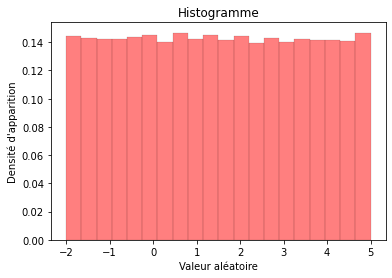

In [ ]:
N = 100000
echantillon = echantillon_uniforme(N, a , b)
histogramme(echantillon)

* **Densité, fonction de répartition, inverse de la fonction de répartition**

In [ ]:
# densité
def densite(xx):
    y = [1/(b-a)*(a <= x < b) for x in xx] # valeurs de la densité
    return y

# Fonction de répartition
def fonction_repartition(xx):
    r = [(x-a)/(b-a)*( a <= x < b) + 1*(x >= b) for x in xx] # valeurs de la fonction de répartition
    return r


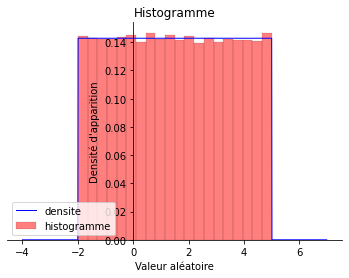

In [ ]:
def densite_fonction2repartition() :
    # représentation graphique de la densité et de la fonction de répartition
    xx = np.arange(a-2, b+2, 0.01)
    y = densite(xx)
    r = fonction_repartition(xx)

    plt.plot(xx,y, 'b', linewidth = 1, label = 'densite') # Pour N grand, l'histogramme colle de mieux en mieux à la densité
    #plt.plot(xx,r, 'g', linewidth = 1, label = 'fonction de répartition')
    centrax()

histogramme(echantillon)
densite_fonction2repartition()
plt.show()

## **2. Loi exponentielle**

Si $U$ suit une loi uniforme sur $[0;1]$ alors $X = \frac{-1}{\lambda} \ln (1 - U)$ suit une loi exponentielle de paramètre $\lambda$. (**cf démonstration en cours, à connaître !!!**)

Ceci permet d'effectuer des tirages aléatoires d'une variable aléatoire $X$ suivant une loi $E(\lambda$).

In [ ]:
def exponentielle(lmbda):
    return (-1/lmbda)*log(1-rd.random())

def echantillon_exponentielle(N,lmbda):
    echt = []
    for k in range(N):
        ex = exponentielle(lmbda)
        echt = echt + [ex]
    return echt

In [ ]:
N = 1000
lmbda = 2

# échantillon
print('Échantillon de',N, 'tirages selon la loi E(',lmbda,')')
echantillon = [0]*N

echantillon[:] = echantillon_exponentielle(N,lmbda)
S = sum(echantillon)

#print(echantillon)
print("Moyenne de l'échantillon :",S/N)
print('Espérance théorique :',1/lmbda)

print("Variance de l'échantillon :",np.var(echantillon))
print('Variance théorique :',1/lmbda**2)

Échantillon de 1000 tirages selon la loi E( 2 )
Moyenne de l'échantillon : 0.4963717210036228
Espérance théorique : 0.5
Variance de l'échantillon : 0.215956461790277
Variance théorique : 0.25


* **Densité, fonction de répartition, inverse de la fonction de répartition**

In [ ]:
# densité
def densite(xx):
    y = [lmbda * exp(-lmbda*x) for x in xx] # valeurs de la densité
    return y

# Fonction de répartition
def fonction_repartition(xx):
    r = [1 - exp(-lmbda*x) for x in xx] # valeurs de la fonction de répartition
    return r

# Réciproque de la fonction de répartition
def inverse_repartition(y):
    x = -1/lmbda*log(1-y)
    return x



* **Représentation graphique : Histogramme**

Pour les variables à densité, le traitement graphique (histogramme) est plus aisé que pour les variables discrètes, puisque Python dispose de la fonction *hist* qui se charge de répartir les données en classes et des les représenter graphiquement.

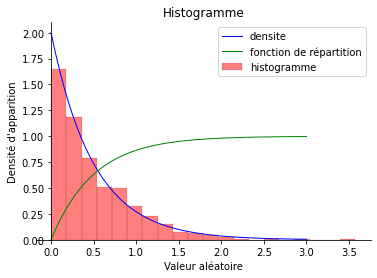

In [ ]:
def histogramme(echantillon) :
    # Histogramme
    plt.hist(echantillon, 20, color = 'red', alpha = 0.5, label = 'histogramme', density ='True', edgecolor = 'black', linewidth = 0.2)

    plt.xlabel('Valeur aléatoire')
    plt.ylabel("Densité d'apparition")
    plt.title('Histogramme')

    centrax()

def densite_fonction2repartition() :
    # représentation graphique de la densité et de la fonction de répartition
    xx = [k*0.01 for k in range(int(6/lmbda)*100+1)]
    y = densite(xx)
    r = fonction_repartition(xx)

    plt.plot(xx,y, 'b', linewidth = 1, label = 'densite') # Pour N grand, l'histogramme colle de mieux en mieux à la densité
    plt.plot(xx,r, 'g', linewidth = 1, label = 'fonction de répartition')
    centrax()

histogramme(echantillon)
densite_fonction2repartition()
plt.show()

* **Simulation par inversion de la fonction de répartition**

Une bille lancée au hasard, horizontalement entre 0 et 1 vient frapper la courbe de la fonction de répartiton et tombe verticalement. 

L'histogramme obtenu après un grand nombre de lancers redessine la densité, d'où son nom...

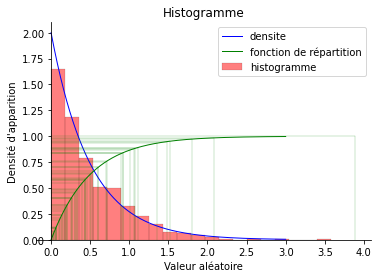

In [ ]:
def graphique_inversion():
    # illustration de l'inversion de la fonction de répartition
    # Une bille lancée au hasard, horizontalement entre 0 et 1 vient frapper la courbe de la fonction de répartiton
    # et tombe verticalement. L'histogramme obtenu après un grand nombre de lancers redessine la densité, d'où son nom...
    U = []
    for k in range(50):
        U = rd.random()
        x = inverse_repartition(U)
        plt.plot([0,x],[U,U],'k', linewidth = 0.2 , label = '', color = 'green')
        plt.plot([x,x],[U,0],'k', linewidth = 0.2 , label = '', color = 'green')

    #plt.legend()
    centrax()
    
histogramme(echantillon)
densite_fonction2repartition()
graphique_inversion()
plt.show()

## **3. Loi normale**

Ce paragraphe utilise le module de statistiques de la bibliothèque de calcul scientifique *SciPy*.

Rien n'est ici exigible, mais c'est pourtant ô combien utile !

In [ ]:
import scipy.stats as stats

### **3.1. Loi normale centrée réduite**



* **Calcul pour un $x$ donné, de $\Phi (x) = P \left( \left[ X \leqslant x \right] \right )$**

***cdf*** comme *Cumulative Distribution Fonction* --> **Fonction de répartition**

        stats.norm.cdf(x , loc = 0, scale = 1)
        # "loc" désigne l'espérance, "scale : l'écart-type



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSOMmG4V8AR6EB-e8XA7h4hmjUi8SH4_dEEylCbz6ACKLu3G3rI3p5cgvrWs80c1KP8mNc&usqp=CAU" width="330" height="150" align = "center"/>




In [ ]:
x = 1.6
phi_x = stats.norm.cdf(x , loc = 0, scale = 1)
# "loc" désigne l'espérance, "scale : l'écart-type

print("Pour x = ", x, ", phi(",x,") = ", phi_x)

Pour x =  1.6 , phi( 1.6 ) =  0.945200708300442



<img src="https://drive.google.com/uc?id=1P-S2qhy81Q_P-yLRYiT4tWw9pAd0HFPJ" width="400" height="340" align = "center"/>


Page GeoGebra pour jouer avec : https://www.geogebra.org/m/dquhtw9k

* **Calcul pour un $u$ donné du quantile $x$ tel que $\Phi(x) = u$**

***ppf*** comme *Percent Point Fonction* --> **percentiles** : valeur x pour laquelle $u \times 100$% de la population donne une valeur de la variable aléatoire inférieure à x (réciproque de *cdf*)

        stats.norm.ppf( u , loc =0, scale = 1)
        # "loc" désigne l'espérance, "scale : l'écart-type

In [ ]:
u = 0.95
quantile_u = stats.norm .ppf(u , loc = 0, scale = 1)
# "loc" désigne l'espérance, "scale : l'écart-type

print("Pour u = ", u, ", quantile(",u,") = ", quantile_u, " : ", u*100,"% de la population prennent une valeur inférieure à ", quantile_u)

Pour u =  0.95 , quantile( 0.95 ) =  1.6448536269514722  :  95.0 % de la population prennent une valeur inférieure à  1.6448536269514722


In [ ]:
stats.norm.ppf( 0.25 , loc = 0, scale = 1)

-0.6744897501960817

* **Densité, fonction de répartition, inverse de la fonction de répartition**

In [ ]:
# densité
def densite(xx, mu = 0, sigma2 = 1):
    sigma = sqrt(sigma2)
    y = [1/sqrt(sigma2 * 2 * pi) * exp(-1/2 * ((x-mu)/sigma)**2) for x in xx] # valeurs de la densité
    return y

# Fonction de répartition
def fonction_repartition(xx, mu = 0, sigma2 = 1):
    sigma = sqrt(sigma2)
    r = [stats.norm.cdf(x , loc = mu,  scale = sigma) for x in xx] # valeurs de la fonction de répartition
    return r

# Réciproque de la fonction de répartition
def inverse_repartition(y, mu = 0, sigma2 = 1):
    sigma = sqrt(sigma2)
    x = stats.norm.ppf( y , loc = mu, scale = sigma)
    return x



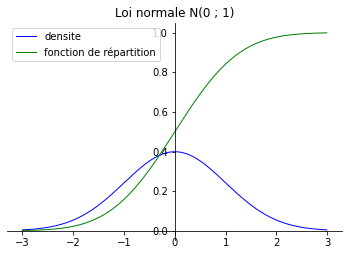

In [ ]:
def densite_fonction2repartition(mu, sigma2) :
    # représentation graphique de la densité et de la fonction de répartition
    sigma = sqrt(sigma2)
    xx = np.arange(mu - 3*sigma, mu + 3*sigma, 0.01)
    y = densite(xx, mu, sigma2)
    r = fonction_repartition(xx, mu, sigma2)

    plt.plot(xx,y, 'b', linewidth = 1, label = 'densite') # Pour N grand, l'histogramme colle de mieux en mieux à la densité
    plt.plot(xx,r, 'g', linewidth = 1, label = 'fonction de répartition')
    centrax()

mu = 0
sigma2 = 1
densite_fonction2repartition(mu, sigma2)
plt.title("Loi normale N(" +str(mu)+ " ; "+ str(sigma2)+ ")")
plt.show()

* **Graphique intéractif**

In [ ]:
from ipywidgets import interact
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Intéragir sur les curseurs 

In [ ]:

def graph_interactif( mu=0,sigma2=1):
    densite_fonction2repartition(mu, sigma2)
    plt.title("Loi normale N(" +str(mu)+ " ; "+ str(sigma2)+ ")")

interact(graph_interactif, mu = (-4, 4, 0.1), sigma2 = (0.1, 16,0.1))
plt.show()

interactive(children=(FloatSlider(value=0.0, description='mu', max=4.0, min=-4.0), FloatSlider(value=1.0, desc…

* **Simulation par la fonction *normal( )* du module *NumPy.random***



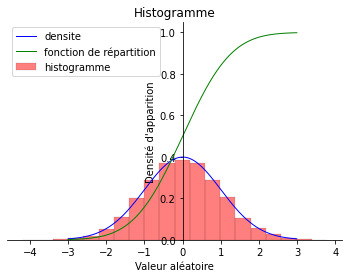

In [ ]:
mu = 0
sigma2 = 1

sigma = sqrt(sigma2)

N = 10000 # taille de l'échantillon de simulation
echantillon = rd.normal(mu, sigma, N)  # simulation de N valeurs aléatoires selon la loi normale N(mu, sigma2)
histogramme(echantillon)

densite_fonction2repartition(mu, sigma2)

plt.show()

* **Simulation par inversion de la fonction de répartition**

Une bille lancée au hasard, horizontalement entre 0 et 1 vient frapper la courbe de la fonction de répartiton et tombe verticalement. 

L'histogramme obtenu après un grand nombre de lancers redessine la densité, d'où son nom...

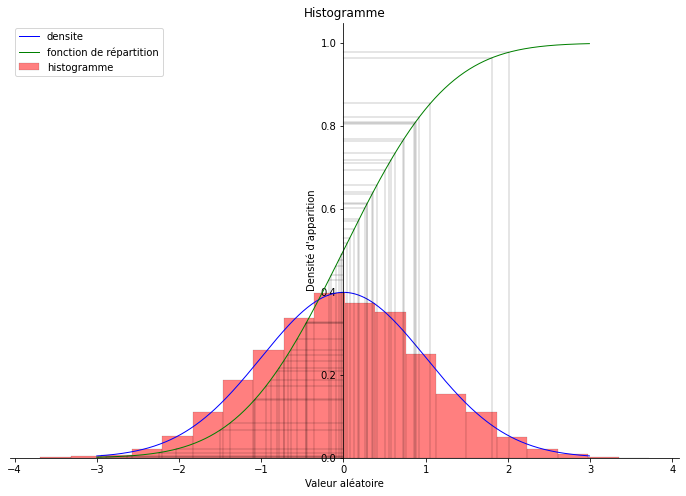

In [ ]:
def graphique_inversion(mu, sigma2):
    # illustration de l'inversion de la fonction de répartition
    # Une bille lancée au hasard, horizontalement entre 0 et 1 vient frapper la courbe de la fonction de répartiton
    # et tombe verticalement. L'histogramme obtenu après un grand nombre de lancers redessine la densité, d'où son nom...
    U = []
    for k in range(50):
        U = rd.random()
        x = inverse_repartition(U, mu, sigma2)
        plt.plot([0,x],[U,U],'k', linewidth = 0.2 , label = '', color = 'black')
        plt.plot([x,x],[U,0],'k', linewidth = 0.2 , label = '', color = 'black')

    #plt.legend()
    centrax()

mu = 0
sigma2 = 1

sigma = sqrt(sigma2)

N = 5000 # taille de l'échantillon de simulation
echantillon = rd.normal(mu, sigma, N)  # simulation de N valeurs aléatoires selon la loi normale N(mu, sigma2)

plt.figure(figsize = (12,8))

histogramme(echantillon)

densite_fonction2repartition(mu, sigma2)
graphique_inversion(mu, sigma2)
plt.show()

## **TP à réaliser maintenant**
Soit $a$ un réel positif.
On considère une variable aléatoire X, dont la densité f est donnée par : 

$$f(t) = \left\{\begin{matrix} 0 \: , si \: t<0 \\ \frac{3t^2}{a^3}, si \: 0\leqslant t \leqslant a \\ 0\: , \: si \: t > a \end{matrix}\right.$$

1. Calculer la fonction de répartition $F_X$ de $X$.
2. Calculer, si possible, espérance et variance de X.
3. Tracer sur un même graphique $f$ et $F_X$.
4. Démontrer que $F_X$ est bijective de $[0,a]$ vers $[0,1]$ et calculer $F_X^{-1}$.
5. Réaliser une simulation Python de $N$ tirages aléatoires selon la variable X, en utilisant le procédé d'inversion de la fonction de répartition.
6. Réaliser l'histogramme de la simulation, l'intervalle $[0,a]$ partagé en $d$ subdivisions. 
7. Qu'observe-t-on ? Que se passe-t-il si on augmente la taille N de l'échantillon ?
8. Calculer la moyenne de l'échantillon et comparer avec l'espérance théorique.
9. Calculer la variance (stastistique) de l'échantillon et comparer avec la variance théorique. 




